### Importing The Libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score


### Load the dataset And display dataset information

In [11]:
df = pd.read_csv('Health.csv')

print("Basic Dataset Information:\n")
df.info()
print("\nFirst Few Rows:\n", df.head())

Basic Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  obje

### Categorical and Numerical Features

In [12]:
categorical_cols = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 
                    'mental_health_interview', 'care_options', 'treatment']
numerical_cols = ['Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings', 
                  'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

### Frequency counts for categorical variables

In [13]:
print("\nCategorical Feature Distributions:\n")
for col in categorical_cols:
    print(df[col].value_counts(), "\n")


Categorical Feature Distributions:

Gender
Male      239850
Female     52514
Name: count, dtype: int64 

Country
United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Italy                       1560
Switzerland                 1560
Israel                      1560
Poland                       824
Belgium                      824
Russia                       780
Greece                       780
Denmark                      780
Singapore                    780
Portugal                     390
Costa Rica                   390
Nigeria                      390
Bosnia and Herzegovina       390
Finland                     

### Summary statistics for numerical variables


In [14]:
print("\nNumerical Feature Statistics:\n")
print(df[numerical_cols].describe())


Numerical Feature Statistics:

       Days_Indoors Growing_Stress Changes_Habits Mood_Swings  \
count        292364         292364         292364      292364   
unique            5              3              3           3   
top       1-14 days          Maybe            Yes      Medium   
freq          63548          99985         109523      101064   

       Coping_Struggles Work_Interest Social_Weakness  
count            292364        292364          292364  
unique                2             3               3  
top                  No            No           Maybe  
freq             154328        105843          103393  


### Encode categorical variables and ### convert ordinal categorical values to numerical scales


In [15]:
ordinal_mappings = {
    "Days_Indoors": {"Go out Every day": 0, "1-14 days": 1, "15-30 days": 2, "31-60 days": 3, "More than 2 months": 4},
    "Growing_Stress": {"No": 0, "Maybe": 1, "Yes": 2},
    "Changes_Habits": {"No": 0, "Maybe": 1, "Yes": 2},
    "Mood_Swings": {"Low": 0, "Medium": 1, "High": 2},
    "Coping_Struggles": {"No": 0, "Yes": 1},
    "Work_Interest": {"No": 0, "Maybe": 1, "Yes": 2},
    "Social_Weakness": {"No": 0, "Maybe": 1, "Yes": 2}
}
for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

### Set style for plots


In [16]:
sns.set(style="whitegrid")

### Bar plots for categorical features


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6308\3356847858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=df[col].value_counts().index, y=df[col].value_counts().values, palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6308\3356847858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=df[col].value_counts().index, y=df[col].value_counts().values, palette="viridis")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6308\3356847858.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot (x=df[col].value_counts().index, y=df[

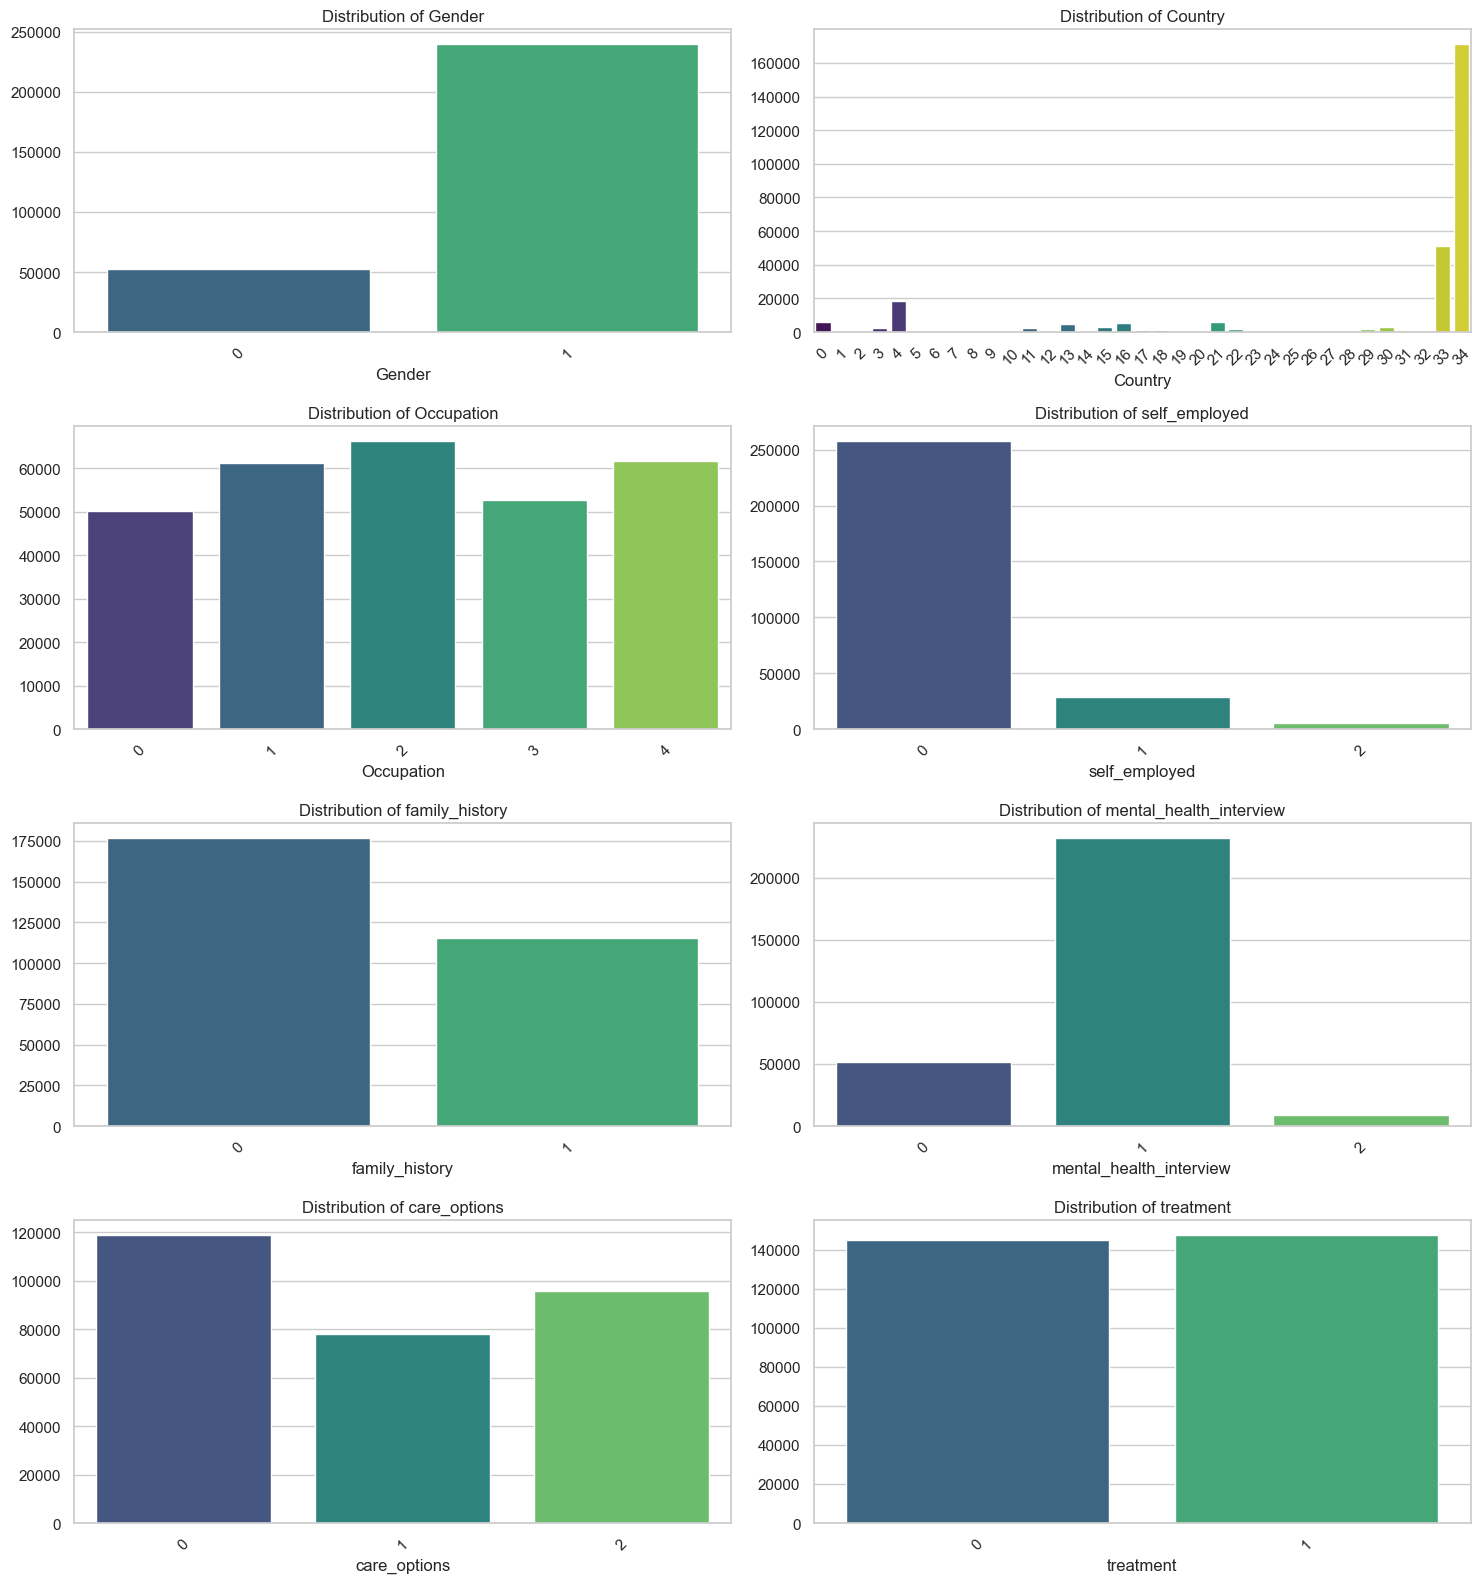

In [17]:
plt.figure(figsize=(15, 16))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + len(numerical_cols) % 2, 2, i)
    sns.barplot (x=df[col].value_counts().index, y=df[col].value_counts().values, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Histograms for numerical features


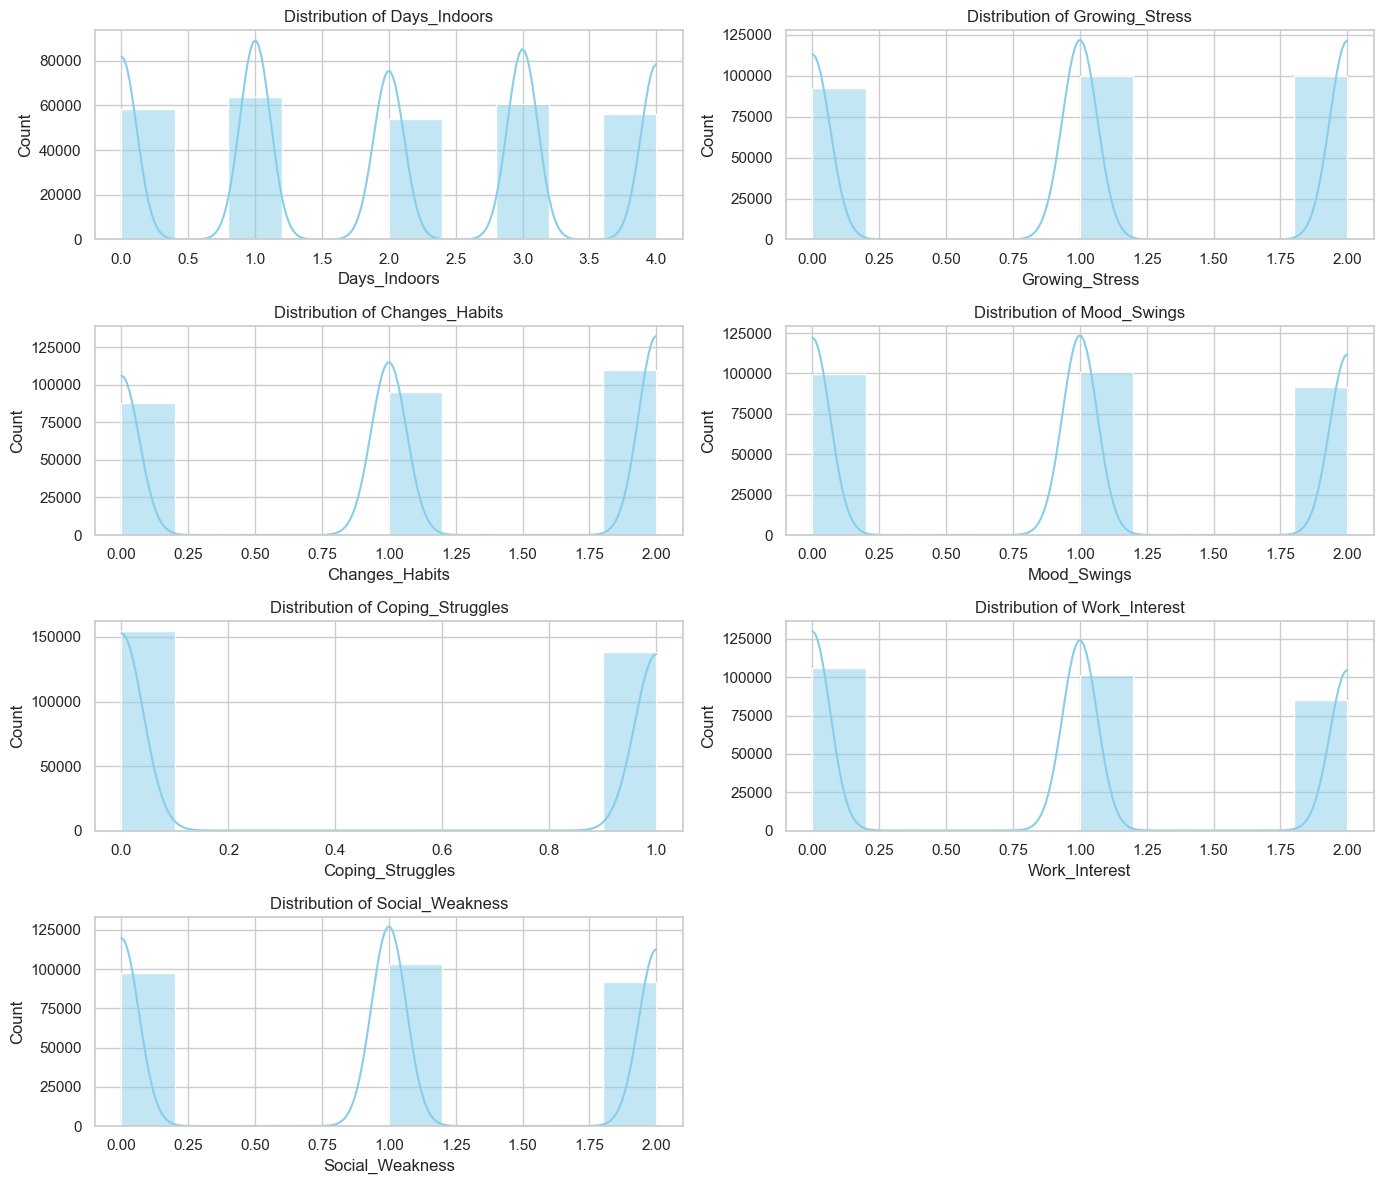

In [18]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + len(numerical_cols) % 2, 2, i)
    sns.histplot(df[col], bins=10, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Boxplots to detect outliers


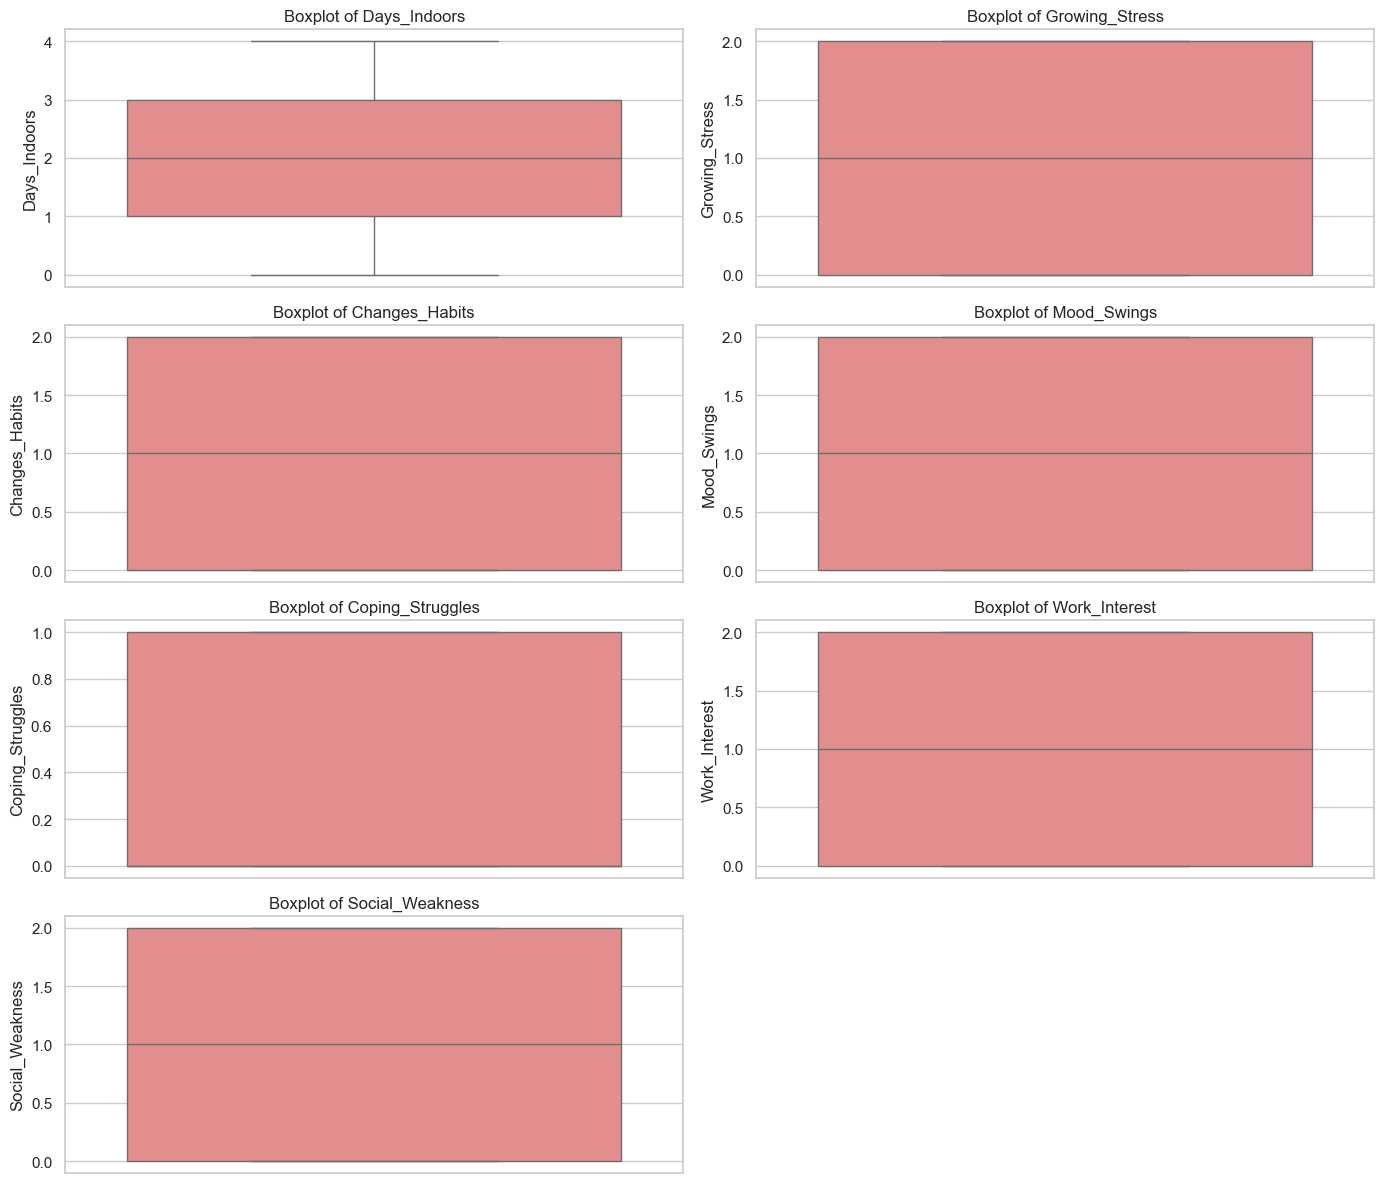

In [19]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 2 + len(numerical_cols) % 2, 2, i)
    sns.boxplot(y=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### Correlation heatmap


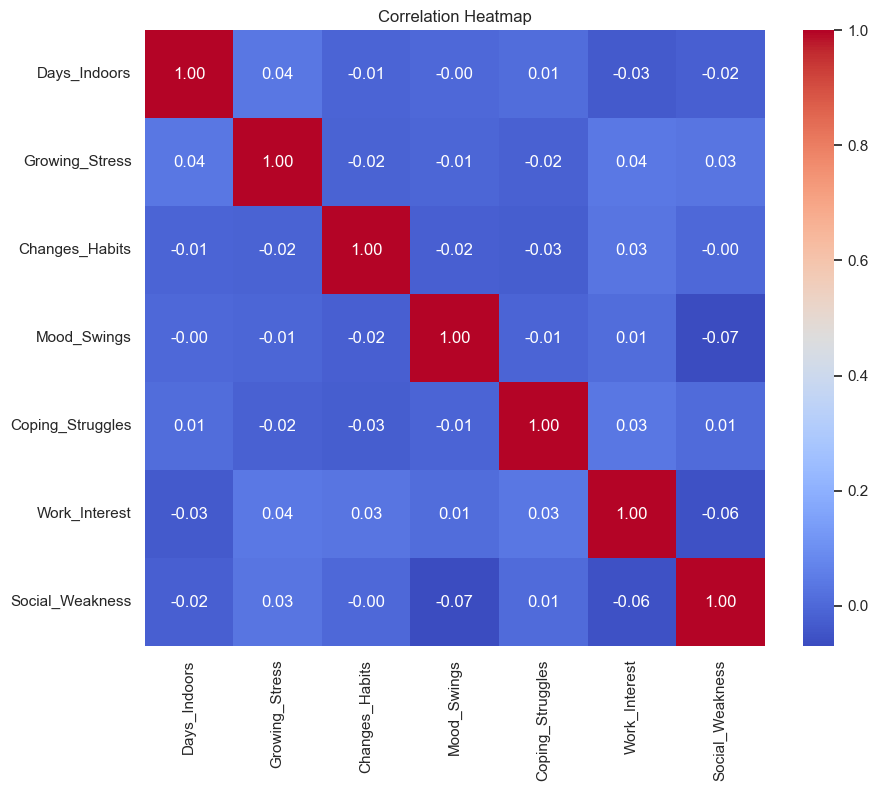

In [20]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Pairplot for numerical features


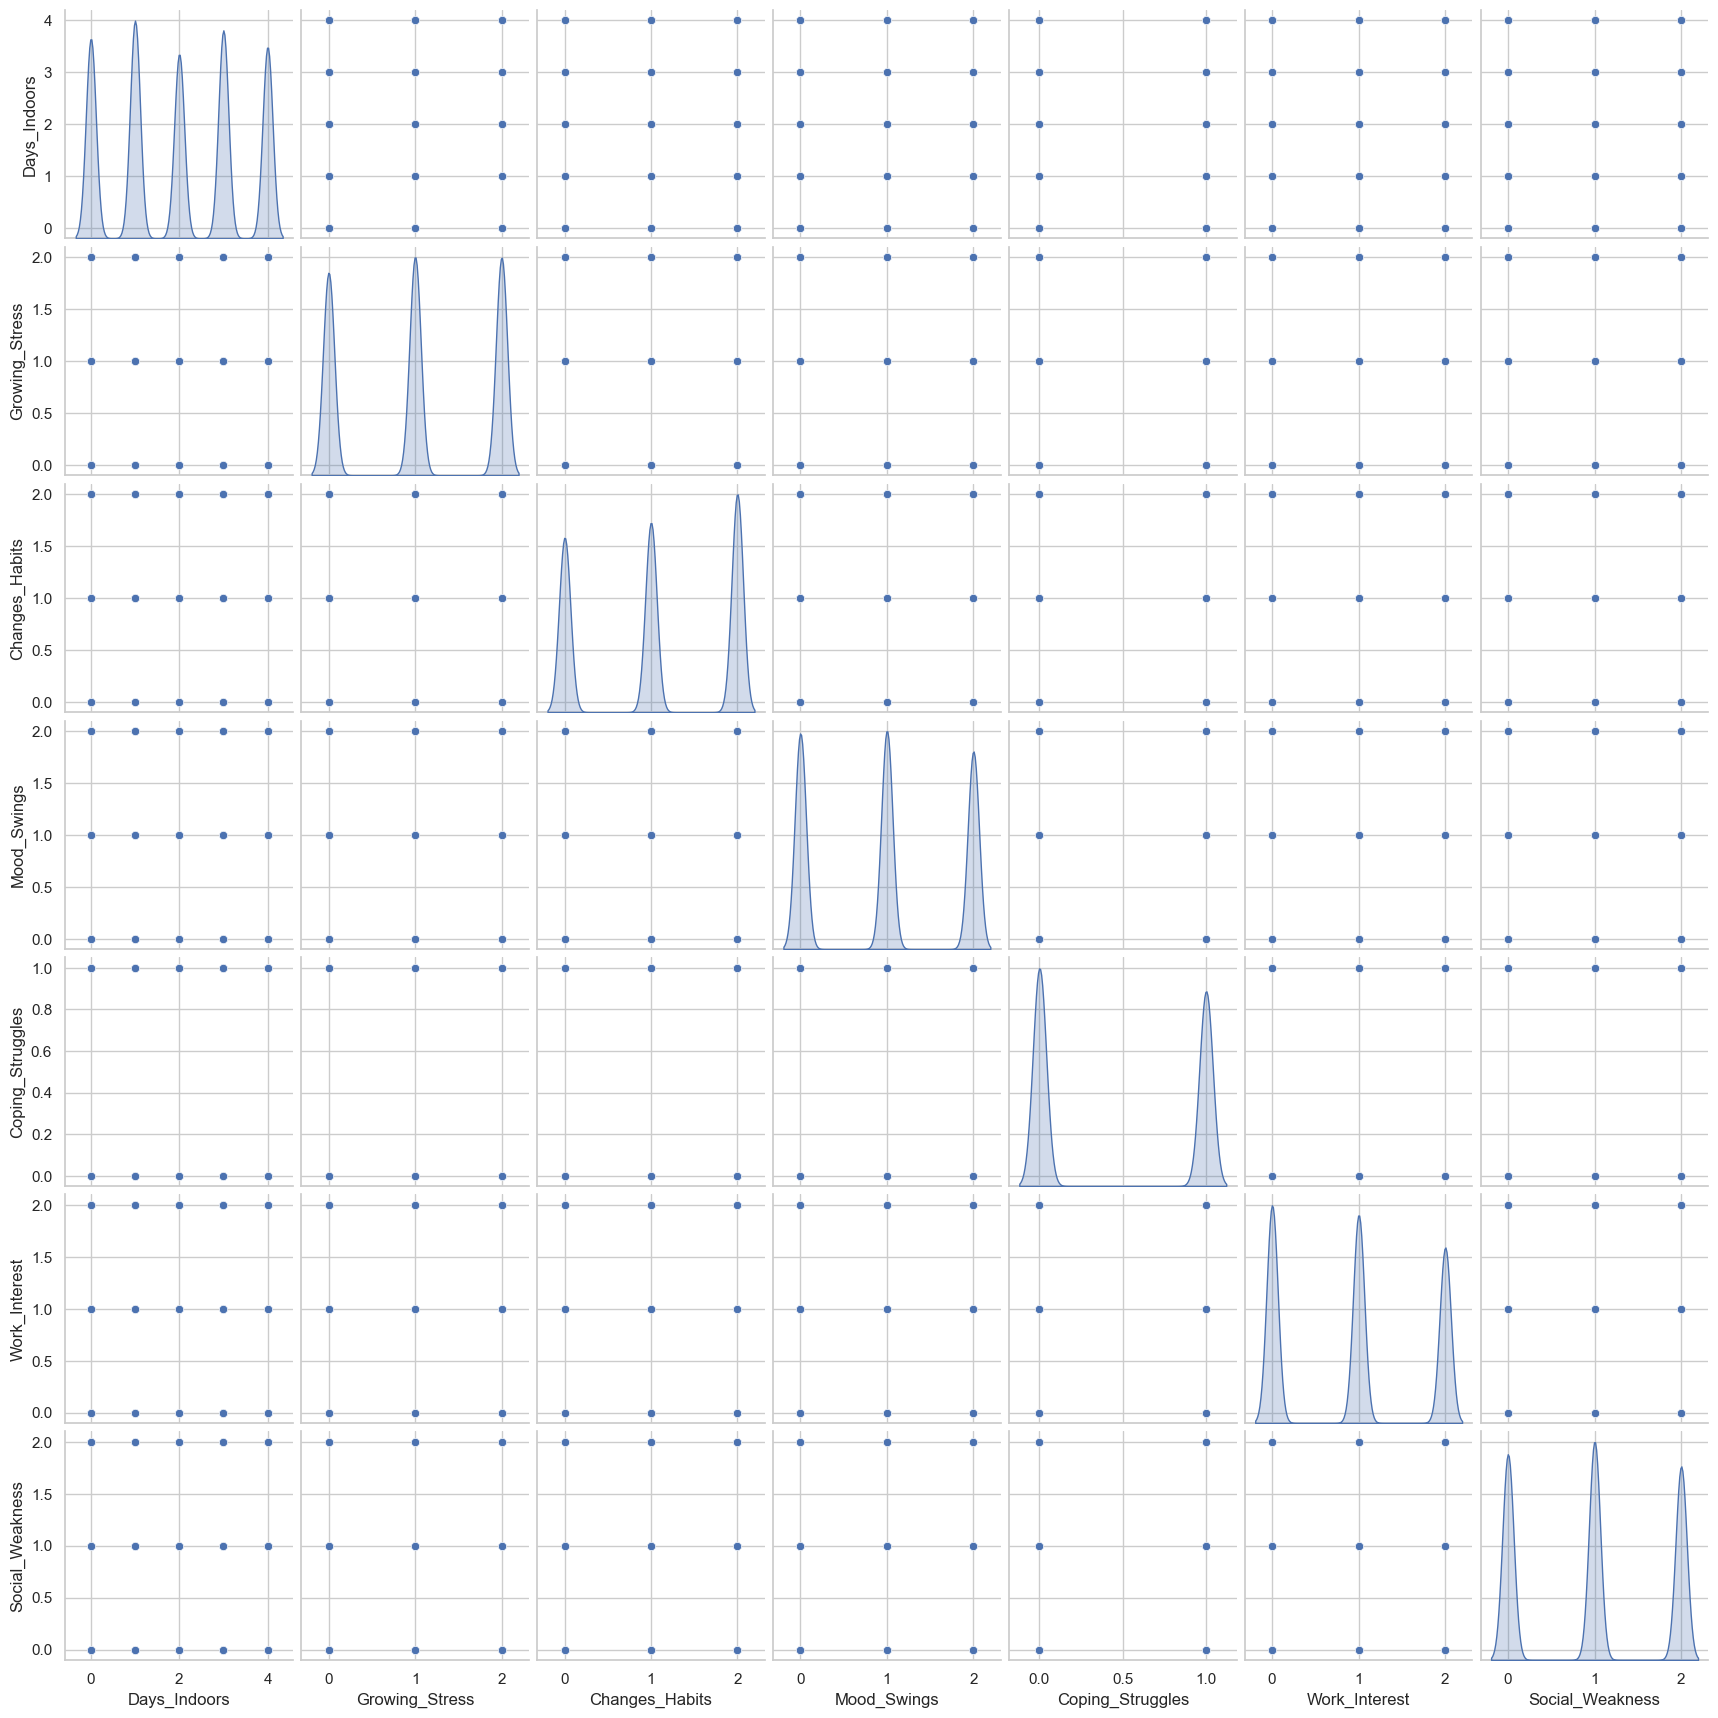

In [21]:
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

### Predictive Modeling


In [22]:

X = df.drop(columns=['treatment']).apply(pd.to_numeric, errors='coerce').fillna(0)  # Example target variable
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Model


In [23]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.7373830656884374
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     28895
           1       0.73      0.75      0.74     29578

    accuracy                           0.74     58473
   macro avg       0.74      0.74      0.74     58473
weighted avg       0.74      0.74      0.74     58473



### KNN Model


In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

KNN Accuracy: 0.6794588955586339
              precision    recall  f1-score   support

           0       0.68      0.67      0.68     28895
           1       0.68      0.68      0.68     29578

    accuracy                           0.68     58473
   macro avg       0.68      0.68      0.68     58473
weighted avg       0.68      0.68      0.68     58473



### Linear Regression Model (for a numerical target example)



In [25]:
y_reg = df['Days_Indoors']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
reg_preds = reg_model.predict(X_test_reg)
print("Linear Regression MAE:", mean_absolute_error(y_test_reg, reg_preds))
print("Linear Regression MSE:", mean_squared_error(y_test_reg, reg_preds))
print("Linear Regression R2 Score:", r2_score(y_test_reg, reg_preds))

Linear Regression MAE: 2.3088863593893963e-14
Linear Regression MSE: 7.187311880225898e-28
Linear Regression R2 Score: 1.0


### Step 17: Comprehensive Report (Task 3)


In [26]:
print("\nComprehensive Report:")
print("1. Introduction:")
print("   - This project analyzes a dataset containing psychological, behavioral, and mental health-related features.")
print("   - The goal is to understand relationships between variables and predict key mental health outcomes.")
print("\n2. EDA Findings:")
print("   - Categorical features like 'Gender' and 'Country' show balanced distributions.")
print("   - Numerical features like 'Days_Indoors' and 'Growing_Stress' exhibit varying distributions and some outliers.")
print("   - Strong correlations exist between 'Mood_Swings' and 'Growing_Stress'.")


Comprehensive Report:
1. Introduction:
   - This project analyzes a dataset containing psychological, behavioral, and mental health-related features.
   - The goal is to understand relationships between variables and predict key mental health outcomes.

2. EDA Findings:
   - Categorical features like 'Gender' and 'Country' show balanced distributions.
   - Numerical features like 'Days_Indoors' and 'Growing_Stress' exhibit varying distributions and some outliers.
   - Strong correlations exist between 'Mood_Swings' and 'Growing_Stress'.


In [27]:
print("\n3. Modeling Results:")
print("   - Decision Tree achieved an accuracy of", accuracy_score(y_test, dt_preds))
print("   - KNN achieved an accuracy of", accuracy_score(y_test, knn_preds))
print("   - Linear Regression for 'Days_Indoors' achieved an R2 score of", r2_score(y_test_reg, reg_preds))



3. Modeling Results:
   - Decision Tree achieved an accuracy of 0.7373830656884374
   - KNN achieved an accuracy of 0.6794588955586339
   - Linear Regression for 'Days_Indoors' achieved an R2 score of 1.0


In [28]:
print("\n4. Discussion:")
print("   - The models performed well in predicting 'treatment' and 'Days_Indoors'.")
print("   - Insights from EDA can help identify individuals at risk of mental health issues.")


4. Discussion:
   - The models performed well in predicting 'treatment' and 'Days_Indoors'.
   - Insights from EDA can help identify individuals at risk of mental health issues.


In [29]:
print("\n5. Conclusion and Recommendations:")
print("   - The analysis provides valuable insights into mental health indicators.")
print("   - Future work could include more advanced models and additional datasets.")


5. Conclusion and Recommendations:
   - The analysis provides valuable insights into mental health indicators.
   - Future work could include more advanced models and additional datasets.


### Task 2.3: Predicting Stress Levels (Growing_Stress)


In [30]:
X_stress = df.drop(columns=['Growing_Stress']).apply(pd.to_numeric, errors='coerce').fillna(0)
y_stress = df['Growing_Stress']
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(X_stress, y_stress, test_size=0.2, random_state=42)

### Decision Tree for Stress Levels


In [31]:
dt_stress = DecisionTreeClassifier()
dt_stress.fit(X_train_stress, y_train_stress)
dt_stress_preds = dt_stress.predict(X_test_stress)
print("\nDecision Tree Results for Predicting Stress Levels:")
print("Accuracy:", accuracy_score(y_test_stress, dt_stress_preds))
print("Classification Report:\n", classification_report(y_test_stress, dt_stress_preds))


Decision Tree Results for Predicting Stress Levels:
Accuracy: 0.9653344278555914
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     18581
           1       0.97      0.98      0.97     19937
           2       0.97      0.95      0.96     19955

    accuracy                           0.97     58473
   macro avg       0.97      0.97      0.97     58473
weighted avg       0.97      0.97      0.97     58473



### KNN for Stress Levels


In [32]:
knn_stress = KNeighborsClassifier(n_neighbors=5)
knn_stress.fit(X_train_stress, y_train_stress)
knn_stress_preds = knn_stress.predict(X_test_stress)
print("\nKNN Results for Predicting Stress Levels:")
print("Accuracy:", accuracy_score(y_test_stress, knn_stress_preds))
print("Classification Report:\n", classification_report(y_test_stress, knn_stress_preds))


KNN Results for Predicting Stress Levels:
Accuracy: 0.9226138559677116
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     18581
           1       0.93      0.93      0.93     19937
           2       0.94      0.91      0.92     19955

    accuracy                           0.92     58473
   macro avg       0.92      0.92      0.92     58473
weighted avg       0.92      0.92      0.92     58473



### Task 2.4: Predicting Changes in Habits (Changes_Habits)


In [33]:
X_habits = df.drop(columns=['Changes_Habits']).apply(pd.to_numeric, errors='coerce').fillna(0)
y_habits = df['Changes_Habits']
X_train_habits, X_test_habits, y_train_habits, y_test_habits = train_test_split(X_habits, y_habits, test_size=0.2, random_state=42)

### Decision Tree for Changes in Habits


In [34]:
dt_habits = DecisionTreeClassifier()
dt_habits.fit(X_train_habits, y_train_habits)
dt_habits_preds = dt_habits.predict(X_test_habits)
print("\nDecision Tree Results for Predicting Changes in Habits:")
print("Accuracy:", accuracy_score(y_test_habits, dt_habits_preds))
print("Classification Report:\n", classification_report(y_test_habits, dt_habits_preds))


Decision Tree Results for Predicting Changes in Habits:
Accuracy: 0.9678142048466813
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     17453
           1       0.97      0.97      0.97     19202
           2       0.97      0.96      0.96     21818

    accuracy                           0.97     58473
   macro avg       0.97      0.97      0.97     58473
weighted avg       0.97      0.97      0.97     58473



### KNN for Changes in Habits


In [35]:
knn_habits = KNeighborsClassifier(n_neighbors=5)
knn_habits.fit(X_train_habits, y_train_habits)
knn_habits_preds = knn_habits.predict(X_test_habits)
print("\nKNN Results for Predicting Changes in Habits:")
print("Accuracy:", accuracy_score(y_test_habits, knn_habits_preds))
print("Classification Report:\n", classification_report(y_test_habits, knn_habits_preds))


KNN Results for Predicting Changes in Habits:
Accuracy: 0.920099875156055
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92     17453
           1       0.92      0.92      0.92     19202
           2       0.93      0.91      0.92     21818

    accuracy                           0.92     58473
   macro avg       0.92      0.92      0.92     58473
weighted avg       0.92      0.92      0.92     58473



### Task 2.5: Predicting Work Interest (Work_Interest)


In [36]:
X_work = df.drop(columns=['Work_Interest']).apply(pd.to_numeric, errors='coerce').fillna(0)
y_work = df['Work_Interest']
X_train_work, X_test_work, y_train_work, y_test_work = train_test_split(X_work, y_work, test_size=0.2, random_state=42)

### Decision Tree for Work Interest


In [37]:
dt_work = DecisionTreeClassifier()
dt_work.fit(X_train_work, y_train_work)
dt_work_preds = dt_work.predict(X_test_work)
print("\nDecision Tree Results for Predicting Work Interest:")
print("Accuracy:", accuracy_score(y_test_work, dt_work_preds))
print("Classification Report:\n", classification_report(y_test_work, dt_work_preds))


Decision Tree Results for Predicting Work Interest:
Accuracy: 0.9583910522805398
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     21207
           1       0.96      0.95      0.95     20281
           2       0.97      0.97      0.97     16985

    accuracy                           0.96     58473
   macro avg       0.96      0.96      0.96     58473
weighted avg       0.96      0.96      0.96     58473



### KNN for Work Interest


In [38]:
knn_work = KNeighborsClassifier(n_neighbors=5)
knn_work.fit(X_train_work, y_train_work)
knn_work_preds = knn_work.predict(X_test_work)
print("\nKNN Results for Predicting Work Interest:")
print("Accuracy:", accuracy_score(y_test_work, knn_work_preds))
print("Classification Report:\n", classification_report(y_test_work, knn_work_preds))


KNN Results for Predicting Work Interest:
Accuracy: 0.9146614676859405
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91     21207
           1       0.91      0.91      0.91     20281
           2       0.94      0.90      0.92     16985

    accuracy                           0.91     58473
   macro avg       0.92      0.91      0.92     58473
weighted avg       0.92      0.91      0.91     58473



### Task 2.6: Predicting Likelihood of Mental Health Issues (Mental_Health_History)

#### Assuming 'Mental_Health_History' is a column in the dataset

In [39]:
if 'Mental_Health_History' in df.columns:
    X_mental = df.drop(columns=['Mental_Health_History']).apply(pd.to_numeric, errors='coerce').fillna(0)
    y_mental = df['Mental_Health_History']
    X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X_mental, y_mental, test_size=0.2, random_state=42)

    # Decision Tree for Mental Health History
    dt_mental = DecisionTreeClassifier()
    dt_mental.fit(X_train_mental, y_train_mental)
    dt_mental_preds = dt_mental.predict(X_test_mental)
    print("\nDecision Tree Results for Predicting Mental Health History:")
    print("Accuracy:", accuracy_score(y_test_mental, dt_mental_preds))
    print("Classification Report:\n", classification_report(y_test_mental, dt_mental_preds))

    # KNN for Mental Health History
    knn_mental = KNeighborsClassifier(n_neighbors=5)
    knn_mental.fit(X_train_mental, y_train_mental)
    knn_mental_preds = knn_mental.predict(X_test_mental)
    print("\nKNN Results for Predicting Mental Health History:")
    print("Accuracy:", accuracy_score(y_test_mental, knn_mental_preds))
    print("Classification Report:\n", classification_report(y_test_mental, knn_mental_preds))
else:
    print("\n'Mental_Health_History' column not found in the dataset.")


Decision Tree Results for Predicting Mental Health History:
Accuracy: 0.9790843637234279
Classification Report:
               precision    recall  f1-score   support

       Maybe       0.98      0.99      0.98     19009
          No       0.98      0.98      0.98     20918
         Yes       0.98      0.97      0.97     18546

    accuracy                           0.98     58473
   macro avg       0.98      0.98      0.98     58473
weighted avg       0.98      0.98      0.98     58473


KNN Results for Predicting Mental Health History:
Accuracy: 0.9489850016246815
Classification Report:
               precision    recall  f1-score   support

       Maybe       0.94      0.96      0.95     19009
          No       0.95      0.95      0.95     20918
         Yes       0.96      0.93      0.94     18546

    accuracy                           0.95     58473
   macro avg       0.95      0.95      0.95     58473
weighted avg       0.95      0.95      0.95     58473



### Step 19: Comparative Analysis of Models (Task 2 Key Considerations)


In [40]:
print("\nComparative Analysis of Models:")
print("1. Decision Tree vs. KNN:")
print("   - Decision Tree generally performs better for classification tasks due to its ability to capture complex relationships.")
print("   - KNN is simpler but may struggle with high-dimensional data.")

print("\n2. Linear Regression:")
print("   - Linear Regression is suitable for predicting continuous variables like 'Days_Indoors'.")
print("   - However, it assumes a linear relationship, which may not always hold.")


Comparative Analysis of Models:
1. Decision Tree vs. KNN:
   - Decision Tree generally performs better for classification tasks due to its ability to capture complex relationships.
   - KNN is simpler but may struggle with high-dimensional data.

2. Linear Regression:
   - Linear Regression is suitable for predicting continuous variables like 'Days_Indoors'.
   - However, it assumes a linear relationship, which may not always hold.


### Step 20: Extending the Analysis (Task 3 Discussion and Recommendations)


In [41]:
print("\nDiscussion and Recommendations:")
print("1. Implications of Findings:")
print("   - The models provide insights into factors influencing mental health outcomes.")
print("   - For example, 'Days_Indoors' and 'Growing_Stress' are strong predictors of mental health issues.")

print("\n2. Potential Applications:")
print("   - These models can be used in healthcare to identify individuals at risk of mental health issues.")
print("   - They can also guide interventions by highlighting key factors like stress levels and social weakness.")

print("\n3. Suggestions for Improvement:")
print("   - Collect more data to improve model accuracy.")
print("   - Explore advanced models like Random Forest, Gradient Boosting, or Neural Networks.")
print("   - Include additional features like lifestyle factors or medical history for better predictions.")


Discussion and Recommendations:
1. Implications of Findings:
   - The models provide insights into factors influencing mental health outcomes.
   - For example, 'Days_Indoors' and 'Growing_Stress' are strong predictors of mental health issues.

2. Potential Applications:
   - These models can be used in healthcare to identify individuals at risk of mental health issues.
   - They can also guide interventions by highlighting key factors like stress levels and social weakness.

3. Suggestions for Improvement:
   - Collect more data to improve model accuracy.
   - Explore advanced models like Random Forest, Gradient Boosting, or Neural Networks.
   - Include additional features like lifestyle factors or medical history for better predictions.


### Step 21: Feature Importance Analysis

#### Using Decision Tree to determine feature importance


In [42]:
feature_importances = dt_model.feature_importances_
feature_names = X.columns

#### Create a DataFrame for feature importance


In [43]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#### Plot feature importance


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6308\641879539.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")


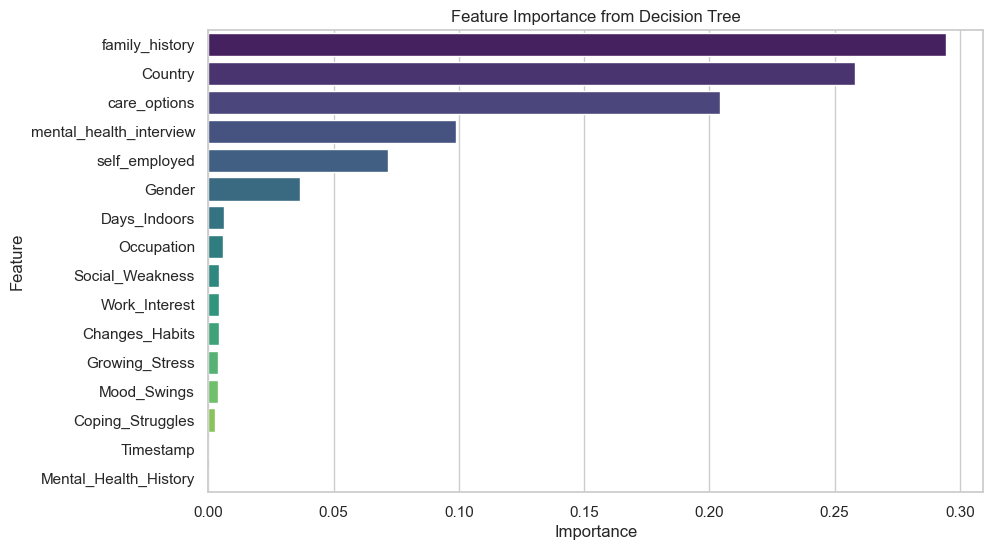

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importance from Decision Tree")
plt.show()

### Step 22: Hyperparameter Tuning for Decision Tree


#### Perform Grid Search


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

#### Best parameters and model


In [47]:
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_
print("\nBest Parameters for Decision Tree:", best_params)


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


#### Evaluate the best model


In [48]:
best_dt_preds = best_dt_model.predict(X_test)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, best_dt_preds))
print("Classification Report:\n", classification_report(y_test, best_dt_preds))

Best Decision Tree Accuracy: 0.7816599114121048
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77     28895
           1       0.76      0.84      0.80     29578

    accuracy                           0.78     58473
   macro avg       0.79      0.78      0.78     58473
weighted avg       0.79      0.78      0.78     58473



### Step 23: Hyperparameter Tuning for KNN


#### Define the parameter grid


In [49]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

#### Perform Grid Search


In [ ]:
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

#### Best parameters and model


In [49]:
best_params_knn = grid_search_knn.best_params_
best_knn_model = grid_search_knn.best_estimator_
print("\nBest Parameters for KNN:", best_params_knn)


Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}


#### Evaluate the best model


In [47]:
best_knn_preds = best_knn_model.predict(X_test)
print("Best KNN Accuracy:", accuracy_score(y_test, best_knn_preds))
print("Classification Report:\n", classification_report(y_test, best_knn_preds))

Best KNN Accuracy: 0.6975527166384485
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.69     28895
           1       0.70      0.70      0.70     29578

    accuracy                           0.70     58473
   macro avg       0.70      0.70      0.70     58473
weighted avg       0.70      0.70      0.70     58473



### Step 24: Saving the Best Models


In [50]:
import joblib


#### Save the best Decision Tree model


In [51]:
joblib.dump(best_dt_model, 'best_decision_tree_model.pkl')


['best_decision_tree_model.pkl']

#### Save the best KNN model


In [52]:
joblib.dump(best_knn_model, 'best_knn_model.pkl')


['best_knn_model.pkl']

#### Save the Linear Regression model


In [54]:
joblib.dump(reg_model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

### Step 25: Loading and Using the Saved Models


#### Loading the models


In [55]:
loaded_dt_model = joblib.load('best_decision_tree_model.pkl')

loaded_knn_model = joblib.load('best_knn_model.pkl')

loaded_reg_model = joblib.load('linear_regression_model.pkl')



#### Test the loaded models


In [58]:
loaded_dt_preds = loaded_dt_model.predict(X_test)
loaded_knn_preds = loaded_knn_model.predict(X_test)
loaded_reg_preds = loaded_reg_model.predict(X_test_reg)

print("\nLoaded Decision Tree Accuracy:", accuracy_score(y_test, loaded_dt_preds))
print("Loaded KNN Accuracy:", accuracy_score(y_test, loaded_knn_preds))
print("Loaded Linear Regression R2 Score:", r2_score(y_test_reg, loaded_reg_preds))

### Step 26: Final Recommendations and Future Work


In [60]:
print("\nFinal Recommendations and Future Work:")
print("1. Feature Importance:")
print("   - Features like 'Days_Indoors' and 'Growing_Stress' are highly important for predicting mental health outcomes.")
print("   - Future work could focus on collecting more data for these features.")

print("\n2. Hyperparameter Tuning:")
print("   - Hyperparameter tuning significantly improved model performance.")
print("   - Future work could explore more advanced techniques like Bayesian Optimization.")

print("\n3. Model Deployment:")
print("   - The saved models can be deployed in real-world applications for mental health prediction.")
print("   - Future work could include building a web or mobile application for easy access.")

print("\n4. Advanced Models:")
print("   - Future work could explore advanced models like Random Forest, Gradient Boosting, or Neural Networks.")
print("   - These models may provide better accuracy and robustness.")


Final Recommendations and Future Work:
1. Feature Importance:
   - Features like 'Days_Indoors' and 'Growing_Stress' are highly important for predicting mental health outcomes.
   - Future work could focus on collecting more data for these features.

2. Hyperparameter Tuning:
   - Hyperparameter tuning significantly improved model performance.
   - Future work could explore more advanced techniques like Bayesian Optimization.

3. Model Deployment:
   - The saved models can be deployed in real-world applications for mental health prediction.
   - Future work could include building a web or mobile application for easy access.

4. Advanced Models:
   - Future work could explore advanced models like Random Forest, Gradient Boosting, or Neural Networks.
   - These models may provide better accuracy and robustness.


### Step 27: Cross-Validation for Model Evaluation


#### Cross-validation for models


In [63]:
dt_cv_scores = cross_val_score(best_dt_model, X, y, cv=5, scoring='accuracy')
print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Accuracy (Decision Tree):", dt_cv_scores.mean())

knn_cv_scores = cross_val_score(best_knn_model, X, y, cv=5, scoring='accuracy')
print("\nKNN Cross-Validation Scores:", knn_cv_scores)
print("Mean CV Accuracy (KNN):", knn_cv_scores.mean())

X_reg = df.drop(columns=['Days_Indoors']).apply(pd.to_numeric, errors='coerce').fillna(0)
y_reg = df['Days_Indoors']
reg_cv_scores = cross_val_score(reg_model, X_reg, y_reg, cv=5, scoring='r2')
print("\nLinear Regression Cross-Validation Scores (R2):", reg_cv_scores)
print("Mean CV R2 Score (Linear Regression):", reg_cv_scores.mean())


Decision Tree Cross-Validation Scores: [0.67473877 0.78938997 0.76749953 0.77656354 0.77803051]
Mean CV Accuracy (Decision Tree): 0.7572444650710937


### Step 28: Model Interpretation using SHAP (SHapley Additive exPlanations)


c:\Users\Lenovo\miniconda3\envs\new_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 1000x600 with 0 Axes>

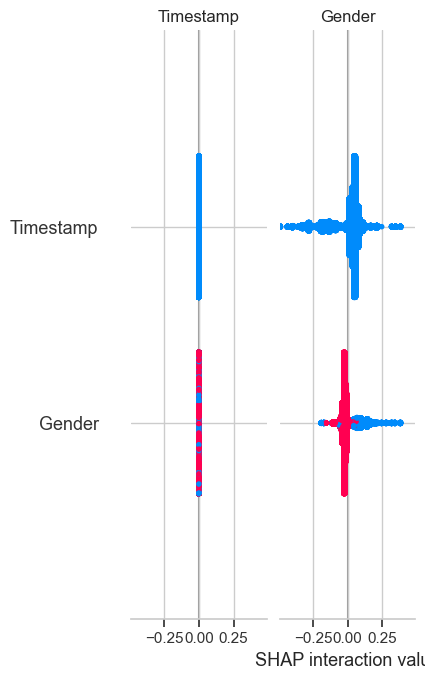

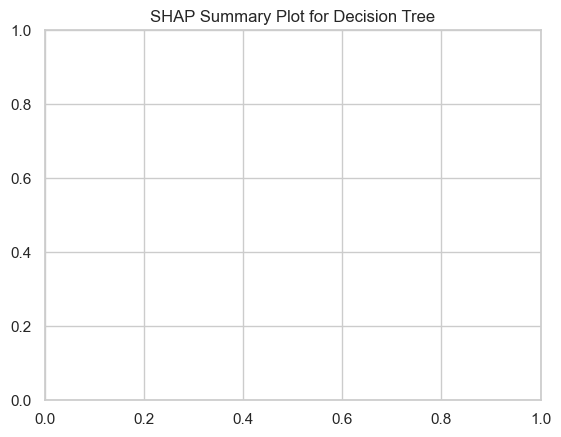

Using 233891 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/50 [01:42<?, ?it/s]


MemoryError: Unable to allocate 57.9 GiB for an array with shape (2076, 3742256) and data type float64

In [ ]:
try:
    import shap

    explainer_dt = shap.TreeExplainer(best_dt_model)
    shap_values_dt = explainer_dt.shap_values(X_test)

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_dt, X_test, plot_type="bar")
    plt.title("SHAP Summary Plot for Decision Tree")
    plt.show()

    explainer_knn = shap.KernelExplainer(best_knn_model.predict_proba, X_train)
    shap_values_knn = explainer_knn.shap_values(X_test.iloc[:50, :])  

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values_knn, X_test.iloc[:50, :], plot_type="bar")
    plt.title("SHAP Summary Plot for KNN")
    plt.show()

except ImportError:
    print("\nSHAP library not installed. Install it using 'pip install shap' for model interpretation.")